In [66]:
# Importing the libraries
import os
import numpy as np
import pandas as pd
import sklearn as sk
import seaborn as sns
import matplotlib.pyplot as plt

In [67]:
data = pd.read_csv('data.csv')

# Checking for missing values
data.isna().sum()

# Dropping the columns with missing values
data = data.dropna(axis=1)

# Checking again for missing values
data.isna().sum()

id                   0
Actual_price         0
Discount_price       0
Currency             0
Country              0
isSale               0
merchant             0
brand                0
Description          0
Category_name        0
primaryCategories    0
name                 0
Impression           0
Day                  0
Month                0
Year                 0
Disc_Per             0
Total_sale           0
dtype: int64

C:\Users\20231116\AppData\Local\Temp\ipykernel_29840\4166726927.py:9: FutureWarning: 'A' is deprecated and will be removed in a future version, please use 'YE' instead.
  sales_trend = data.resample('A').sum()['Total_sale']


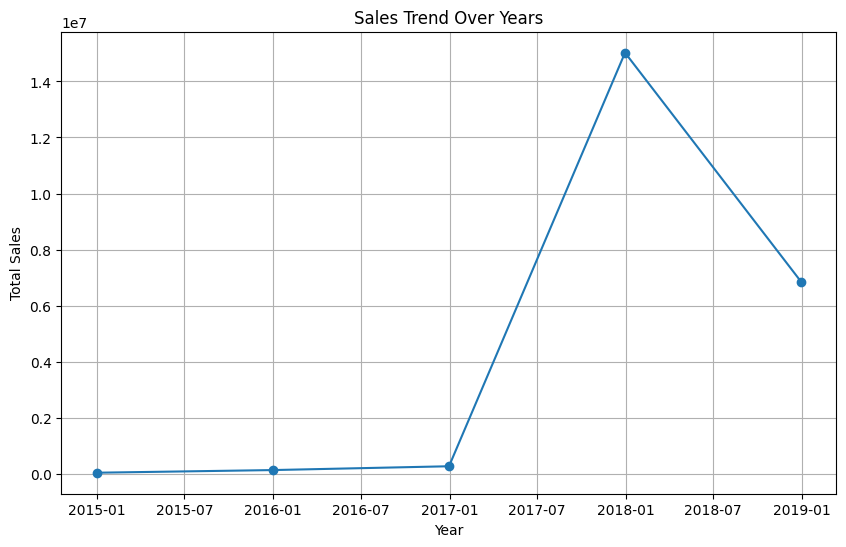

In [68]:
import matplotlib.pyplot as plt
import pandas as pd

# Assuming data is your DataFrame and it's already loaded
data['Year'] = pd.to_datetime(data['Year'], format='%Y') # Convert 'Year' to datetime
data.set_index('Year', inplace=True) # Set 'Year' as index

# Group by 'Year' and calculate the sum of 'Total_sale' for each year
sales_trend = data.resample('A').sum()['Total_sale']

# Plotting
plt.figure(figsize=(10,6))
plt.plot(sales_trend.index, sales_trend.values, marker='o', linestyle='-')
plt.xlabel('Year')
plt.ylabel('Total Sales')
plt.title('Sales Trend Over Years')
plt.grid(True)
plt.show()


In [83]:
# Finding the important features
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 14592 entries, 2017-01-01 to 2015-01-01
Data columns (total 17 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 14592 non-null  object 
 1   Actual_price       14592 non-null  float64
 2   Discount_price     14592 non-null  float64
 3   Currency           14592 non-null  object 
 4   Country            14592 non-null  object 
 5   isSale             14592 non-null  bool   
 6   merchant           14592 non-null  object 
 7   brand              14592 non-null  object 
 8   Description        14592 non-null  object 
 9   Category_name      14592 non-null  object 
 10  primaryCategories  14592 non-null  object 
 11  name               14592 non-null  object 
 12  Impression         14592 non-null  int64  
 13  Day                14592 non-null  int64  
 14  Month              14592 non-null  int64  
 15  Disc_Per           14592 non-null  float64
 16  Total

In [84]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor

# Assuming data is your DataFrame and it's already loaded
X = data[['Actual_price', 'Discount_price', 'isSale', 'Impression', 'Day', 'Month', 'Disc_Per']]
y = data['Total_sale']

# Convert boolean to int
X['isSale'] = X['isSale'].astype(int)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# Create a Random Forest Regressor object
rf_regressor = RandomForestRegressor(n_estimators=100, random_state=42)

# Fit the model to the training data
rf_regressor.fit(X_train, y_train)

# Make predictions using the testing set
y_pred = rf_regressor.predict(X_test)



C:\Users\20231116\AppData\Local\Temp\ipykernel_29840\1440781566.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['isSale'] = X['isSale'].astype(int)


In [85]:
# Finding the accuracy of the model
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

print('Mean Squared Error:', mean_squared_error(y_test, y_pred))
print('R2 Score:', r2_score(y_test, y_pred))

Mean Squared Error: 274349.06728598505
R2 Score: 0.9784905952577505


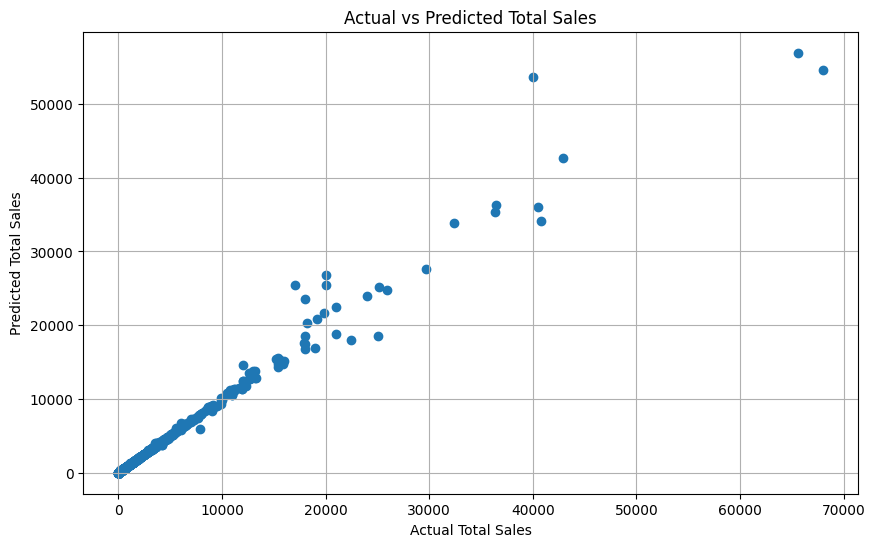

In [86]:
# Plotting the actual vs predicted values
plt.figure(figsize=(10,6))
plt.scatter(y_test, y_pred)
plt.xlabel('Actual Total Sales')
plt.ylabel('Predicted Total Sales')
plt.title('Actual vs Predicted Total Sales')
plt.grid(True)
plt.show()

c:\Users\20231116\Desktop\big-data\env\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
C:\Users\20231116\AppData\Local\Temp\ipykernel_29840\1646847188.py:12: FutureWarning: 'A' is deprecated and will be removed in a future version, please use 'YE' instead.
  sales_trend = data.resample('A').sum()['Total_sale']


Predicted Total Sales for the Next Year: 71.95359999999988


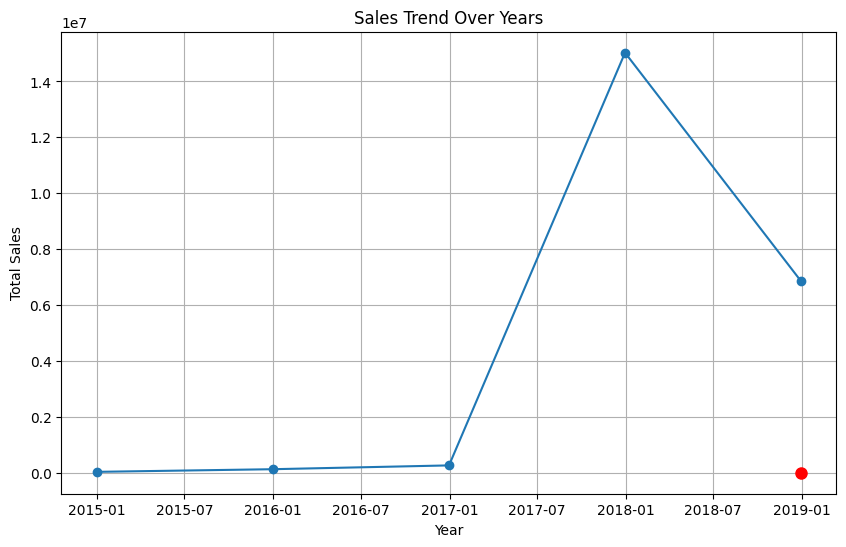

In [88]:
# Predicting the total sales for the next year
# Assuming data is your DataFrame and it's already loaded
X_new = data[['Actual_price', 'Discount_price', 'isSale', 'Impression', 'Day', 'Month', 'Disc_Per']].iloc[-1]
X_new['isSale'] = X_new['isSale'].astype(int)
X_new = X_new.values.reshape(1, -1)

# Predict the total sales for the next year
y_new = rf_regressor.predict(X_new)
print('Predicted Total Sales for the Next Year:', y_new[0])

# Plotting the trend sales for the next year
sales_trend = data.resample('A').sum()['Total_sale']

# Plotting
plt.figure(figsize=(10,6))
plt.plot(sales_trend.index, sales_trend.values, marker='o', linestyle='-')
plt.plot(sales_trend.index[-1], y_new, marker='o', markersize=8, color='red')
plt.xlabel('Year')
plt.ylabel('Total Sales')
plt.title('Sales Trend Over Years')
plt.grid(True)